<a href="https://colab.research.google.com/github/ichaelo/Intelligent-information-system/blob/main/katyabumba_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [2]:
age = ctrl.Antecedent(np.arange(0, 101, 1), "Возраст")
gender = ctrl.Antecedent(np.arange(0, 101, 1), "Пол")

weight = ctrl.Consequent(np.arange(0, 101, 1), "Вес")

<h1> Треугольник

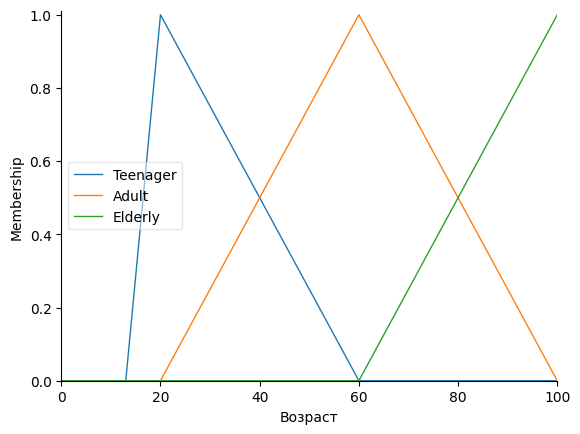

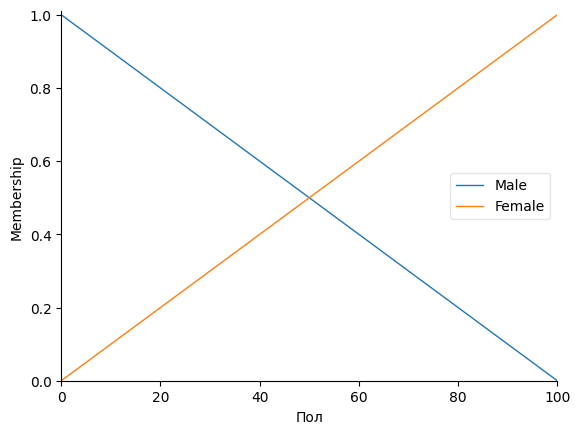

In [3]:
age["Teenager"] = fuz.trimf(age.universe, [13, 20, 60])
age["Adult"] = fuz.trimf(age.universe, [20, 60, 100])
age["Elderly"] = fuz.trimf(age.universe, [60, 100, 101])

gender["Male"] = fuz.trimf(gender.universe, [0, 0, 100])
gender["Female"] = fuz.trimf(gender.universe, [0, 100, 101])

age.view() # криво, т.к. выполняем по условиям (13 до 20, 20 до 60, 60+)
gender.view()

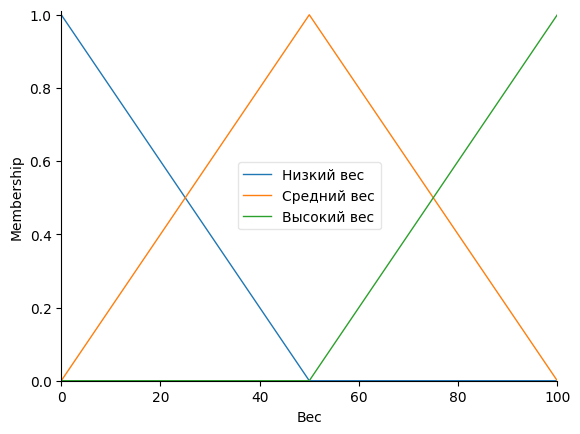

In [4]:
weight["Низкий вес"] = fuz.trimf(weight.universe, [0, 0, 50])
weight["Средний вес"] = fuz.trimf(weight.universe, [0, 50, 100])
weight["Высокий вес"] = fuz.trimf(weight.universe, [50, 100, 101])

weight.view()

<h1> Основные правила

1. Если возраст подросток и пол мужской, установить высокий вес.
2. Если возраст подросток и пол женский, установить средний вес.
3. Если возраст взрослый и пол мужской, установить высокий вес.
4. Если возраст взрослый и пол женский, установить средний вес.
5. Если возраст пожилой, установить низкий вес.


In [5]:
rule1 = ctrl.Rule(age["Teenager"] & gender["Male"], weight["Высокий вес"])
rule2 = ctrl.Rule(age["Teenager"] & gender["Female"], weight["Средний вес"])
rule3 = ctrl.Rule(age["Adult"] & gender["Male"], weight["Высокий вес"])
rule4 = ctrl.Rule(age["Adult"] & gender["Female"], weight["Средний вес"])
rule5 = ctrl.Rule(age["Elderly"] & gender["Female"], weight["Низкий вес"])
rule6 = ctrl.Rule(age["Elderly"] & gender["Male"], weight["Низкий вес"])

In [6]:
weight_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
perenos = ctrl.ControlSystemSimulation(weight_ctrl)

Допустимый переносимый вес 50.00


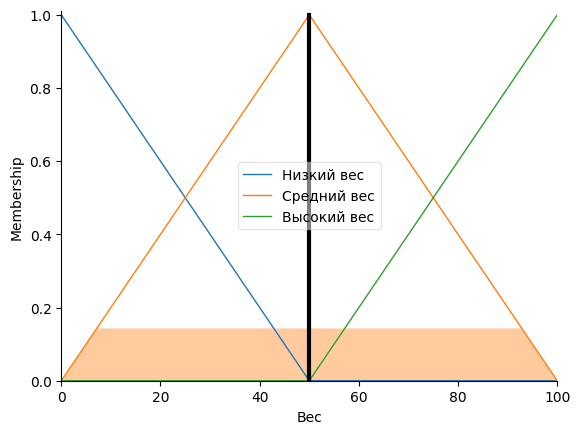

In [64]:
perenos.input["Возраст"] = 14 # Смена возраста даст другой результат, лучше заранее поэксперементировать с циферками, т.к. иногда разница незначительная. с 60+ идёт убывание по условию
perenos.input["Пол"] = "Female" # Смена пола даст другой результат. Мужчина всегда поднимет больше.

perenos.compute()

print(f"Допустимый переносимый вес { perenos.output['Вес']:.2f}")

weight.view(sim = perenos)

<h1> Трапеция

In [8]:
age_trapmf = ctrl.Antecedent(np.arange(0, 101, 1), "Возраст")
gender_trapmf = ctrl.Antecedent(np.arange(0, 101, 1), "Пол")

weight_trapmf = ctrl.Consequent(np.arange(0, 101, 1), "Вес")

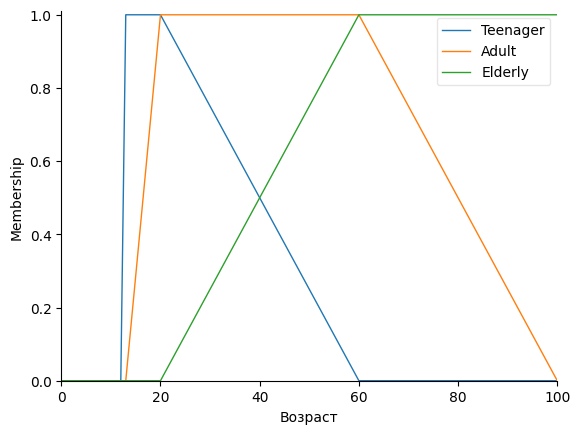

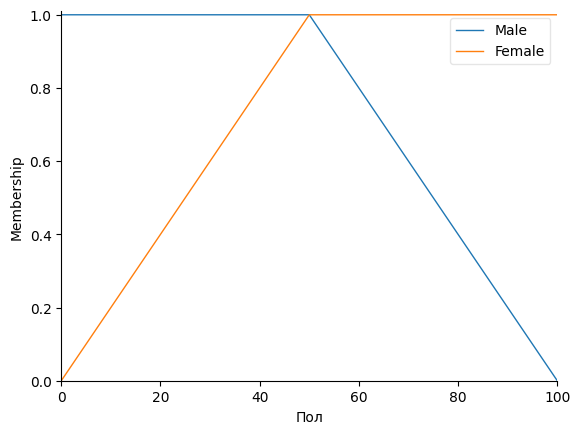

In [9]:
age_trapmf["Teenager"] = fuz.trapmf(age_trapmf.universe, [13, 13, 20, 60])
age_trapmf["Adult"] = fuz.trapmf(age_trapmf.universe, [13, 20, 60, 100])
age_trapmf["Elderly"] = fuz.trapmf(age_trapmf.universe, [20, 60, 100, 101])

gender_trapmf["Male"] = fuz.trapmf(gender_trapmf.universe, [0, 0, 50, 100])
gender_trapmf["Female"] = fuz.trapmf(gender_trapmf.universe, [0, 50, 100, 101])

age_trapmf.view()
gender_trapmf.view()

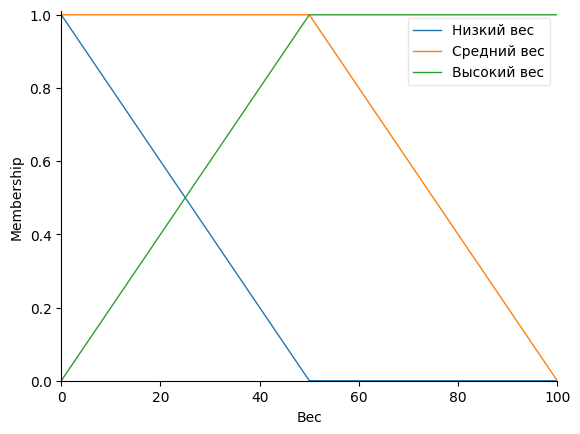

In [10]:
weight_trapmf["Низкий вес"] = fuz.trapmf(weight_trapmf.universe, [0, 0, 0, 50])
weight_trapmf["Средний вес"] = fuz.trapmf(weight_trapmf.universe, (0, 0, 50, 100))
weight_trapmf["Высокий вес"] = fuz.trapmf(weight_trapmf.universe, [0, 50, 100, 101])

weight_trapmf.view()

In [11]:
rule1_trapmf = ctrl.Rule(age_trapmf["Teenager"] & gender_trapmf["Male"], weight_trapmf["Высокий вес"])
rule2_trapmf = ctrl.Rule(age_trapmf["Teenager"] & gender_trapmf["Female"], weight_trapmf["Средний вес"])
rule3_trapmf = ctrl.Rule(age_trapmf["Adult"] & gender_trapmf["Male"], weight_trapmf["Высокий вес"])
rule4_trapmf = ctrl.Rule(age_trapmf["Adult"] & gender_trapmf["Female"], weight_trapmf["Средний вес"])
rule5_trapmf = ctrl.Rule(age_trapmf["Elderly"] & gender_trapmf["Female"], weight_trapmf["Низкий вес"])
rule6_trapmf = ctrl.Rule(age_trapmf["Elderly"] & gender_trapmf["Male"], weight_trapmf["Низкий вес"])

In [12]:
weight_ctrl_trapmf = ctrl.ControlSystem([rule1_trapmf , rule2_trapmf , rule3_trapmf , rule4_trapmf , rule5_trapmf , rule6_trapmf ])
perenos_trapmf = ctrl.ControlSystemSimulation(weight_ctrl_trapmf)

Допустимый переносимый вес 38.89


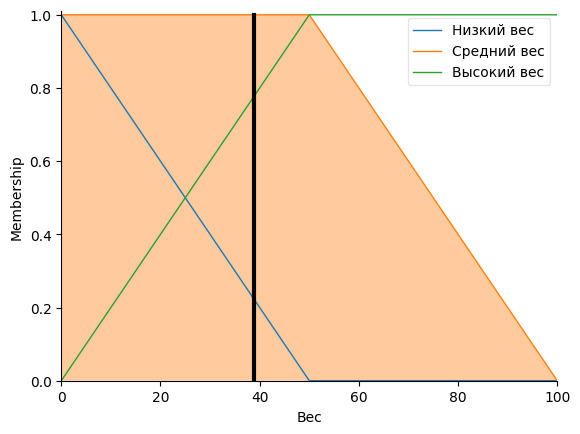

In [41]:
perenos_trapmf.input["Возраст"] = 14 # тоже самое что и выше
perenos_trapmf.input["Пол"] = "Female"

perenos_trapmf.compute()

print(f"Допустимый переносимый вес {perenos_trapmf.output['Вес']:.2f}")

weight_trapmf.view(sim = perenos_trapmf)

<h1> Гаусс

In [26]:
age_gauss = ctrl.Antecedent(np.arange(0, 101, 1), "Возраст")
gender_gauss = ctrl.Antecedent(np.arange(0, 101, 1), "Пол")

weight_gauss = ctrl.Consequent(np.arange(0, 101, 1), "Вес")

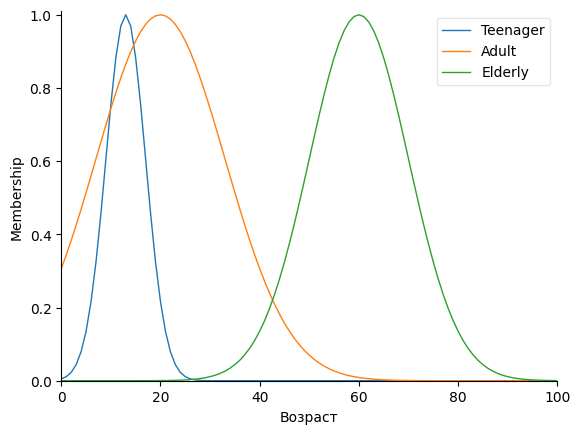

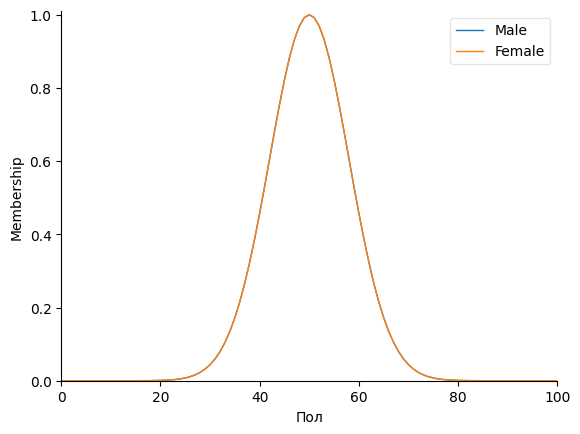

In [49]:
age_gauss["Teenager"] = fuz.membership.gaussmf(age_gauss.universe, mean = 13, sigma = 4)
age_gauss["Adult"] = fuz.membership.gaussmf(age_gauss.universe, mean = 20, sigma = 13)
age_gauss["Elderly"] = fuz.membership.gaussmf(age_gauss.universe, mean = 60, sigma = 10)

gender_gauss["Male"] = fuz.membership.gaussmf(gender_gauss.universe, mean = 50, sigma = 8)
gender_gauss["Female"] = fuz.membership.gaussmf(gender_gauss.universe, mean = 50, sigma = 8)


age_gauss.view()
gender_gauss.view() # не уверен что так :(

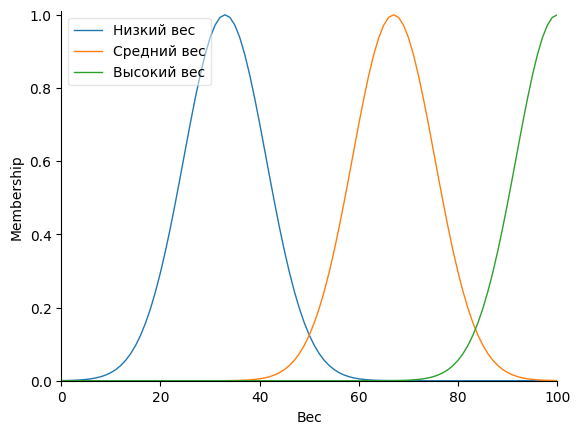

In [53]:
weight_gauss["Низкий вес"] = fuz.membership.gaussmf(weight_gauss.universe, mean = 33, sigma = 8.33)
weight_gauss["Средний вес"] = fuz.membership.gaussmf(weight_gauss.universe, mean = 67, sigma = 8.33)
weight_gauss["Высокий вес"] = fuz.membership.gaussmf(weight_gauss.universe, mean = 100, sigma = 8.33)

weight_gauss.view()

In [54]:
rule1_gauss = ctrl.Rule(age_gauss["Teenager"] & gender_gauss["Male"], weight_gauss["Высокий вес"])
rule2_gauss = ctrl.Rule(age_gauss["Teenager"] & gender_gauss["Female"], weight_gauss["Средний вес"])
rule3_gauss = ctrl.Rule(age_gauss["Adult"] & gender_gauss["Male"], weight_gauss["Высокий вес"])
rule4_gauss = ctrl.Rule(age_gauss["Adult"] & gender_gauss["Female"], weight_gauss["Средний вес"])
rule5_gauss = ctrl.Rule(age_gauss["Elderly"] & gender_gauss["Female"], weight_gauss["Низкий вес"])
rule6_gauss = ctrl.Rule(age_gauss["Elderly"] & gender_gauss["Male"], weight_gauss["Низкий вес"])

In [55]:
weight_ctrl_gauss = ctrl.ControlSystem([rule1_gauss , rule2_gauss , rule3_gauss , rule4_gauss , rule5_gauss , rule6_gauss ])
perenos_gauss = ctrl.ControlSystemSimulation(weight_ctrl_trapmf)

Допустимый переносимый вес 19.42


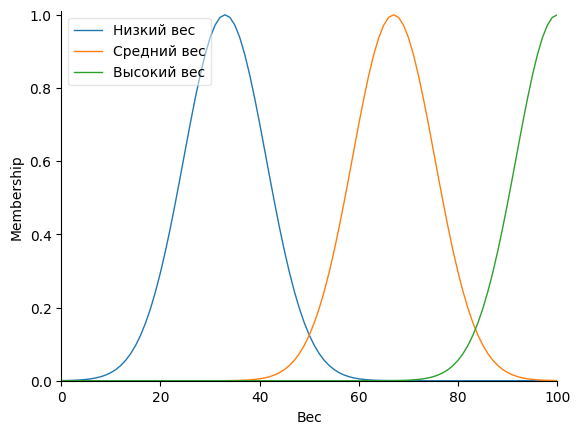

In [66]:
perenos_gauss.input["Возраст"] = 99
perenos_gauss.input["Пол"] = "Female"

perenos_gauss.compute()

print(f"Допустимый переносимый вес {perenos_gauss.output['Вес']:.2f}")

weight_gauss.view(sim = perenos_gauss)